In [ ]:
# Import libreris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [ ]:
#Data upload
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)

In [ ]:
# Data description
print("Descriptive statistics for numerical columns:\n")
print(data.describe()) 

data.to_csv("data.csv", index=False)

Descriptive statistics for numerical columns:

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
# Identify missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

print("\nMissing values report:\n")
print(missing_report)

# Verify
if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset!")
else:
    print(f"\nTotal columns with missing values: {missing_report[missing_report['Missing Values'] > 0].shape[0]}")



Missing values report:

                Missing Values  Percentage (%)
occupation                1843        5.660146
workclass                 1836        5.638647
native-country             583        1.790486
fnlwgt                       0        0.000000
education                    0        0.000000
education-num                0        0.000000
age                          0        0.000000
marital-status               0        0.000000
relationship                 0        0.000000
sex                          0        0.000000
race                         0        0.000000
capital-gain                 0        0.000000
capital-loss                 0        0.000000
hours-per-week               0        0.000000
income                       0        0.000000

Total columns with missing values: 3


In [ ]:
# Data filling
for col in ['workclass', 'occupation', 'native-country']:
    most_frequent = data[col].mode()[0]
    data[col].fillna(most_frequent, inplace=True)

C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\4186804631.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(most_frequent, inplace=True)


In [ ]:
# Error Correction
data = data.drop_duplicates()

In [8]:
print(data.isnull().sum())
print(data.duplicated().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
0


In [10]:
## Feature Engineering 
data['is_highly_educated'] = (data['education-num'] > 12).astype(int) #Separă persoanele cu studii superioare de cele fără
data['workclass_binary'] = data['workclass'].apply(lambda x: 'public' if x in ['State-gov', 'Federal-gov', 'Local-gov'] else 'private') #Transformarea workclass în două categorii mari: public/privat:
def categorize_occupation(occupation):
    if occupation in ['Craft-repair', 'Handlers-cleaners', 'Farming-fishing', 'Machine-op-inspct', 'Transport-moving']:
        return 'manual'
    elif occupation in ['Priv-house-serv','Protective-serv','Armed-Forces', 'Adm-clerical', 'Other-service','Tech-support', 'Sales']:
        return 'services'
    else:
        return 'executive'
data['occupation_type'] = data['occupation'].apply(categorize_occupation) #Gruparea ocupațiilor în categorii mari (fizic/servicii/executiv)
data['is_us_based'] = data['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)  # US-based sau nu
data['has_own_family'] = data['relationship'].apply(lambda x: 1 if x in ['Husband', 'Wife', 'Own-Child'] else 0) #Are familie realizată sau nu
data['is_white']= data['race'].apply(lambda x: 1 if x in ['White'] else 0)

In [11]:
data.to_csv("data_preprocessed.csv", index=False)

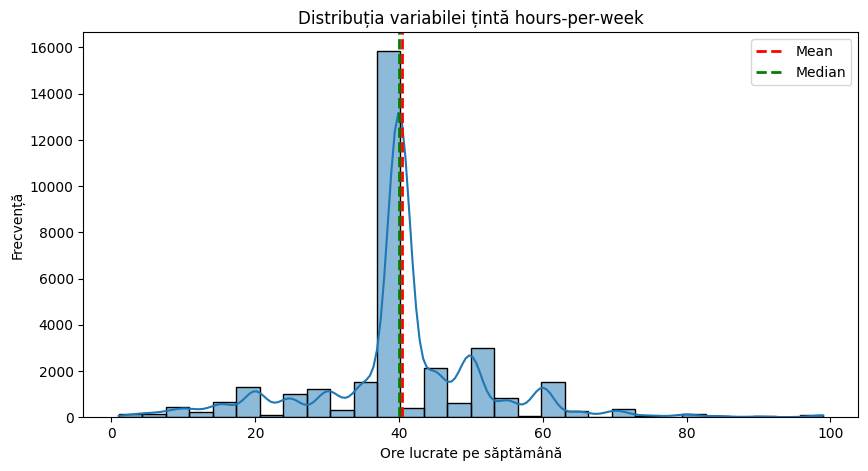

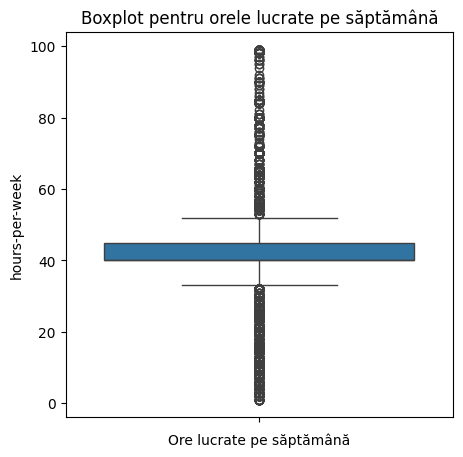

In [ ]:
# Histogrm for hours-per-week
plt.figure(figsize=(10, 5))
sns.histplot(data['hours-per-week'], bins=30, kde=True)
plt.axvline(data['hours-per-week'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['hours-per-week'].median(), color='g', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title('Distribuția variabilei țintă hours-per-week')
plt.xlabel('Ore lucrate pe săptămână')
plt.ylabel('Frecvență')
plt.show()

# Boxplot for outliers
plt.figure(figsize=(5, 5))
sns.boxplot(data['hours-per-week'])
plt.title('Boxplot pentru orele lucrate pe săptămână')
plt.xlabel('Ore lucrate pe săptămână')
plt.show()

The histogram shows that the majority of individuals work around 40 hours per week.
The red dashed line (mean) and green dashed line (median) are closely aligned, indicating a fairly symmetric distribution around 40 hours.
The distribution has minor peaks around 20 hours and higher peaks around 60 hours, suggesting subgroups within the data (e.g., part-time workers or people with overtime).
The boxplot reveals several outliers, particularly individuals working fewer than 20 hours or more than 60 hours per week.
The interquartile range (IQR) is concentrated around 40 hours, indicating this is where most data lies.
Extreme outliers might need to be handled depending on the regression model’s sensitivity.

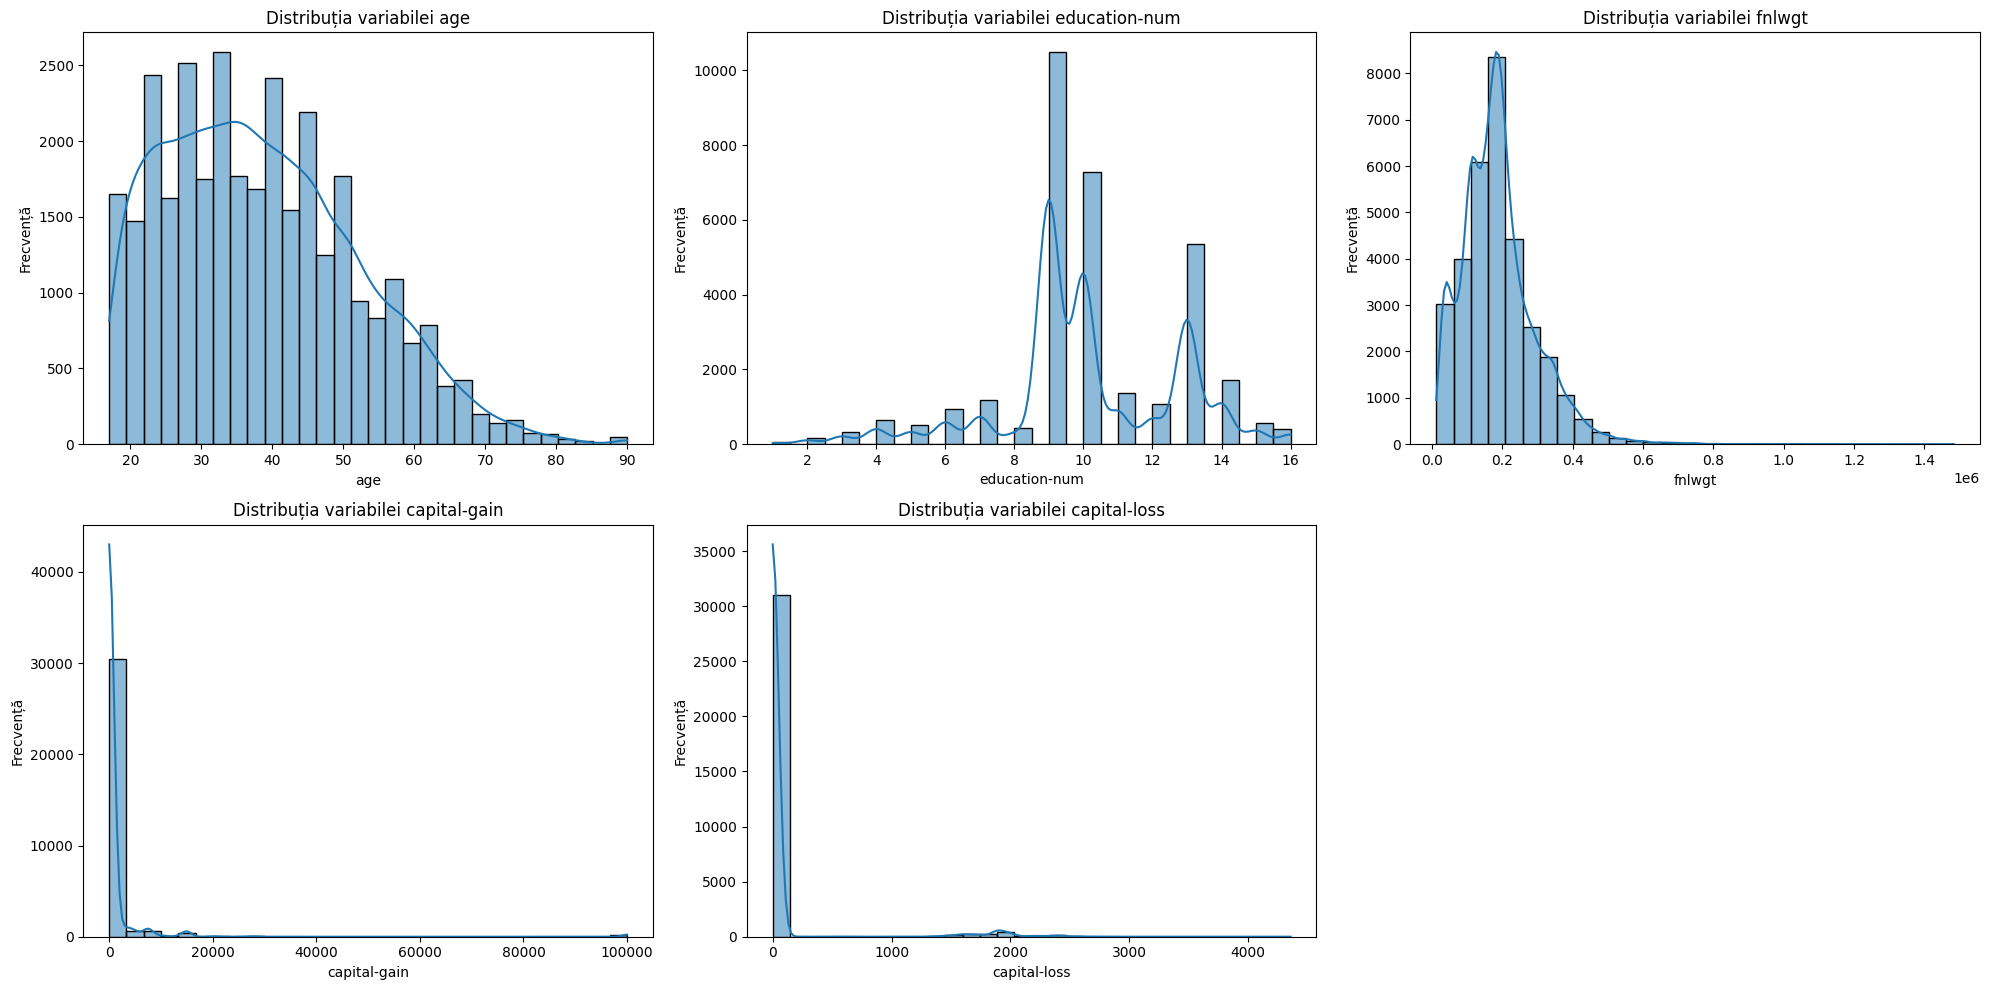

In [ ]:
# Histograme for numerical variables
numerical_columns = ['age', 'education-num', 'fnlwgt', 'capital-gain', 'capital-loss']

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribuția variabilei {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')

plt.tight_layout()
plt.show()

age:
 The distribution is right-skewed, with the majority of individuals in the dataset being in their late 20s to early 50s.
There is a steady decline in frequency as age increases, and very few individuals are above 70.

education-num:
The distribution appears multimodal, with peaks at specific levels of education, such as 9 and 10 years.
This likely corresponds to common education milestones (e.g., high school graduates).

fnlwgt:
This variable has a right-skewed distribution, with most values concentrated at the lower end and a long tail extending toward higher values.
This is typical for sampling weights, as most individuals fall into average weight categories.

capital-gain:
Highly skewed with a majority of values at zero.
A few extreme outliers exist, with values up to 100,000.

capital-loss:
Similar to capital-gain, the distribution is heavily skewed, with most values at zero and a few high outliers.

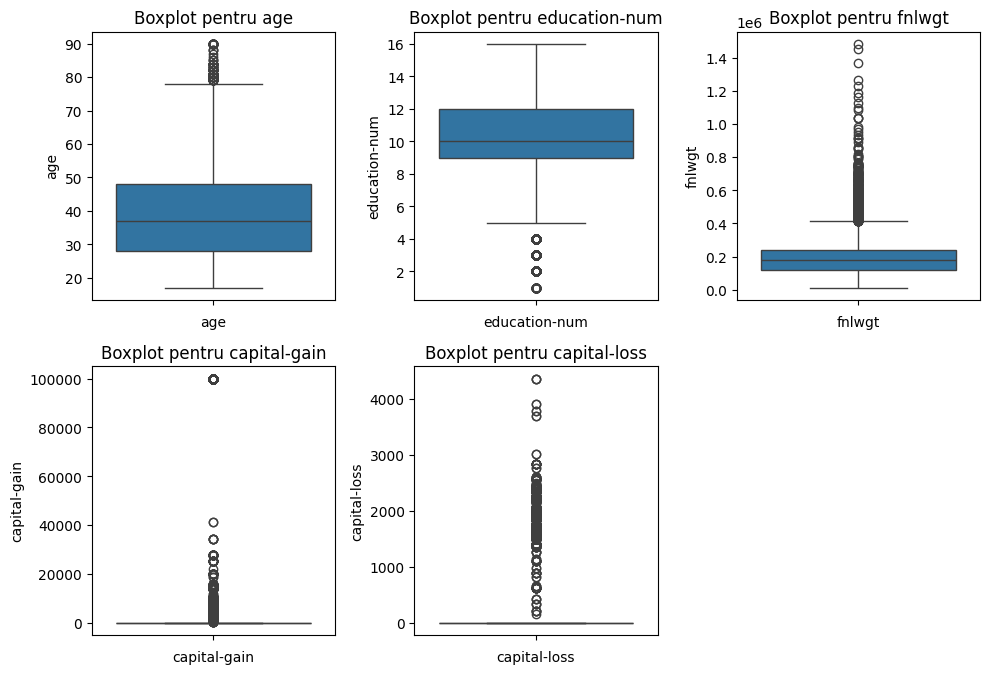

In [ ]:
# Boxplot for outliers of numerial variables
numerical_columns = ['age', 'education-num', 'fnlwgt', 'capital-gain', 'capital-loss']

plt.figure(figsize=(10, 7))
for i, col in enumerate(numerical_columns, 1):  # Enumerăm începând de la 1
    plt.subplot(2, 3, i)  # 1 rând, len(numerical_columns) coloane, index i
    sns.boxplot(data[col])
    plt.title(f'Boxplot pentru {col}')
    plt.xlabel(col)

plt.tight_layout()  # Ajustare pentru a evita suprapunerea
plt.show()

age:
The boxplot shows a few outliers, primarily for individuals above ~70 years old.
These can be valid data points.

education-num:
A few outliers exist below 5, representing individuals with minimal education.
The majority of the data falls between 9 and 13, as seen in the histogram.

fnlwgt:
This feature has numerous extreme outliers above ~500,000.
As it is a sampling weight, these values might be valid but could affect the model if not transformed or normalized.

capital-gain:
There are extreme outliers, including values at 100,000.
The vast majority of the data is concentrated at zero.

capital-loss:
Similar to capital-gain, there are outliers, though less extreme. Most of the data is at zero.

C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\3395378784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\3395378784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\3395378784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette=

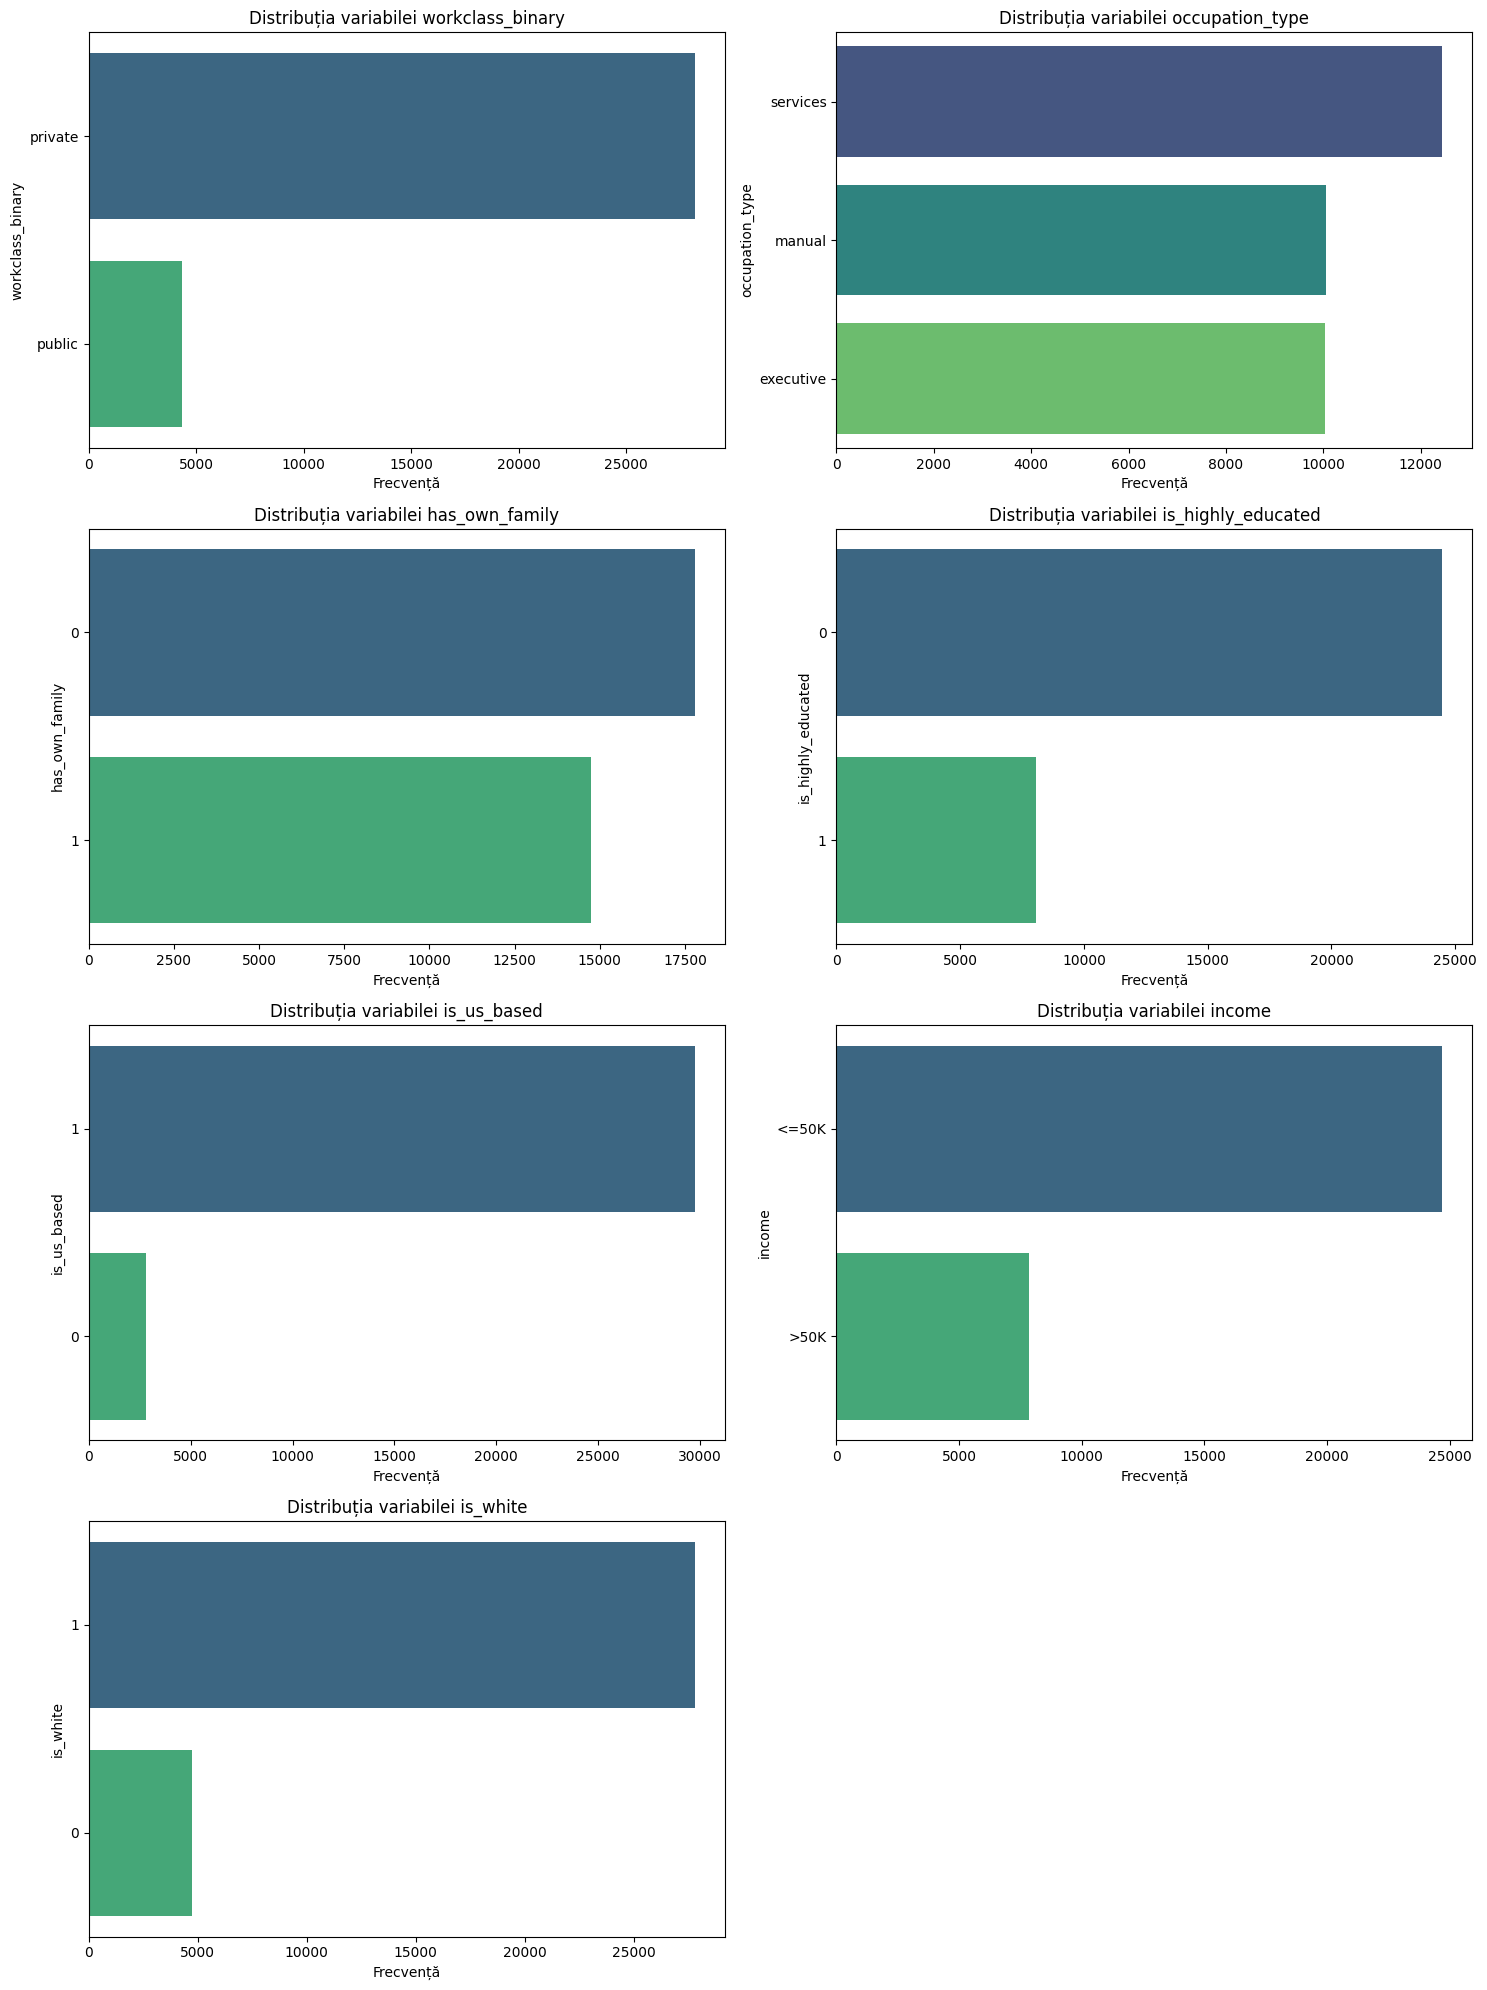

In [ ]:
# Bar plots for categorical variables
categorical_columns = ['workclass_binary', 'occupation_type', 'has_own_family', 'is_highly_educated', 'is_us_based', 'income', 'is_white']

n_cols = 2  
n_rows = -(-len(categorical_columns) // n_cols)  

plt.figure(figsize=(15, 5 * n_rows))  

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i) 
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Distribuția variabilei {col}')
    plt.xlabel('Frecvență')
    plt.ylabel(col)

plt.tight_layout()  
plt.show()

workclass_binary:
Most individuals work in the private sector, with a smaller proportion in public/government roles.

occupation_type:
The "services" category dominates, followed by "manual" and "executive" roles.

has_own_family:
A significant portion of the dataset does not have their own family, while the remainder does.

is_highly_educated:
Most individuals are not highly educated (i.e., education-num <= 12).

is_us_based:
The majority of individuals are based in the United States, with a smaller proportion from other countries.

income:
There is a significant imbalance, with most individuals earning <=50K compared to >50K.

is_white:
The majority of individuals in the dataset are classified as White.

In [18]:
# Funcție pentru detectarea outlierilor utilizând IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Outliers below {lower_bound} and above {upper_bound}")
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Detectarea outlierilor pentru variabile numerice
for col in ['age']:
    detect_outliers_iqr(data, col)

age: Outliers below -2.0 and above 78.0


In [19]:
# Funcție pentru eliminarea outlierilor
def treat_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Tratarea outlierilor pentru variabile numerice
for col in ['age']:
    treat_outliers_iqr(data, col)

In [22]:
# Function to apply log transformation to specified columns
def apply_log_transformation(data, columns):
    for col in columns:
        data[col] = data[col].apply(lambda x: np.log1p(x))
        print(f"Log transformation applied to column '{col}'.")
    return data

# Apply log transformation to 'capital-gain' and 'capital-loss'
log_columns = ['capital-gain', 'capital-loss']
data = apply_log_transformation(data, log_columns)
data[['capital-gain', 'capital-loss']].describe()

Log transformation applied to column 'capital-gain'.
Log transformation applied to column 'capital-loss'.


capital-gain  capital-loss
count  32537.000000  32537.000000
mean       0.098946      0.053425
std        0.328258      0.241436
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.260380      1.175120

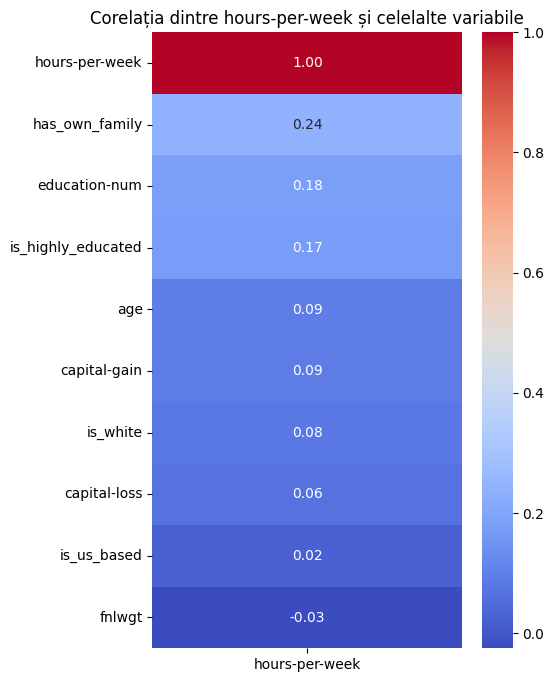

In [19]:
#Matricea de corelație
# Selectăm doar coloanele numerice
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Matricea de corelație completă
correlation_matrix = numeric_data.corr()

# Selectăm doar corelațiile cu variabila țintă 'hours-per-week'
target_correlation = correlation_matrix[['hours-per-week']].sort_values(by='hours-per-week', ascending=False)

# Vizualizare grafică a corelațiilor
plt.figure(figsize=(5, 8))
sns.heatmap(target_correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Corelația dintre hours-per-week și celelalte variabile')
plt.show()

Strongest Correlations:

has_own_family (0.24):
Individuals with their own family (e.g., husband, wife, own-child) tend to work slightly more hours on average.
education-num (0.18) and is_highly_educated (0.17):
Higher education is positively associated with working more hours, though the correlation is moderate.
These correlations align with expectations, as higher education may be linked to professions requiring longer hours.

Weak Positive Correlations:
age (0.09):
Age has a weak positive correlation with hours-per-week, suggesting older individuals might work slightly more, but the effect is minimal.
capital-gain (0.09):
Some positive association with hours worked, likely reflecting higher earnings in professions with longer hours.
is_white (0.08):
Slight positive correlation; not particularly significant.

Very Weak or Negligible Correlations:
capital-loss (0.06), is_us_based (0.02), and fnlwgt (-0.03):
These features have almost no meaningful correlation with hours-per-week.
This aligns with expectations for variables like fnlwgt, which is a sampling weight and unrelated to working hours.

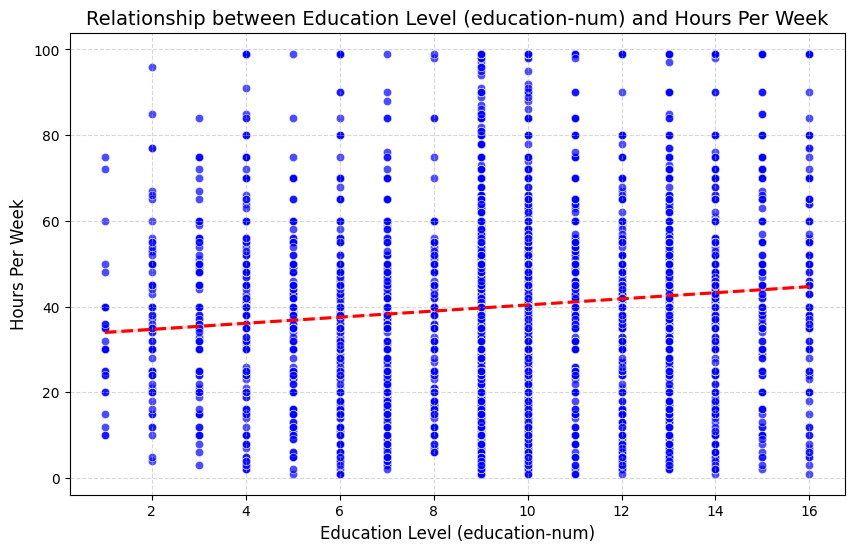

In [23]:
# Scatter plot între education-num și hours-per-week
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['education-num'], 
    y=data['hours-per-week'], 
    alpha=0.7, 
    color='blue'
)

# Adăugăm o linie de tendință (regression line)
sns.regplot(
    x=data['education-num'], 
    y=data['hours-per-week'], 
    scatter=False, 
    color='red', 
    line_kws={'linestyle': '--'}
)

# Personalizăm plot-ul
plt.title('Relationship between Education Level (education-num) and Hours Per Week', fontsize=14)
plt.xlabel('Education Level (education-num)', fontsize=12)
plt.ylabel('Hours Per Week', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

Positive Trend:
The red dashed line indicates a positive linear relationship between education level and hours-per-week.
As education level increases, the average hours worked per week also tend to increase slightly.

Clustered Data:
There is significant clustering at specific education levels, particularly around 9, 10, 12, and 16, reflecting common education milestones (e.g., high school, some college, and advanced degrees).
Similarly, hours-per-week is heavily concentrated around 40 hours, consistent with typical full-time work hours.

Weak Correlation:
While the trend line shows a positive relationship, the correlation coefficient (0.18 from the heatmap) suggests this is a weak relationship.
This means education level alone doesn't strongly predict working hours, but it may still be a meaningful feature in combination with others.

C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\2651210658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['hours-per-week'], palette='viridis')
C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\2651210658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['hours-per-week'], palette='viridis')
C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\2651210658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['hours-per-week'], palette='viridis')
C:\Users\voicu\AppData\Local\Temp\

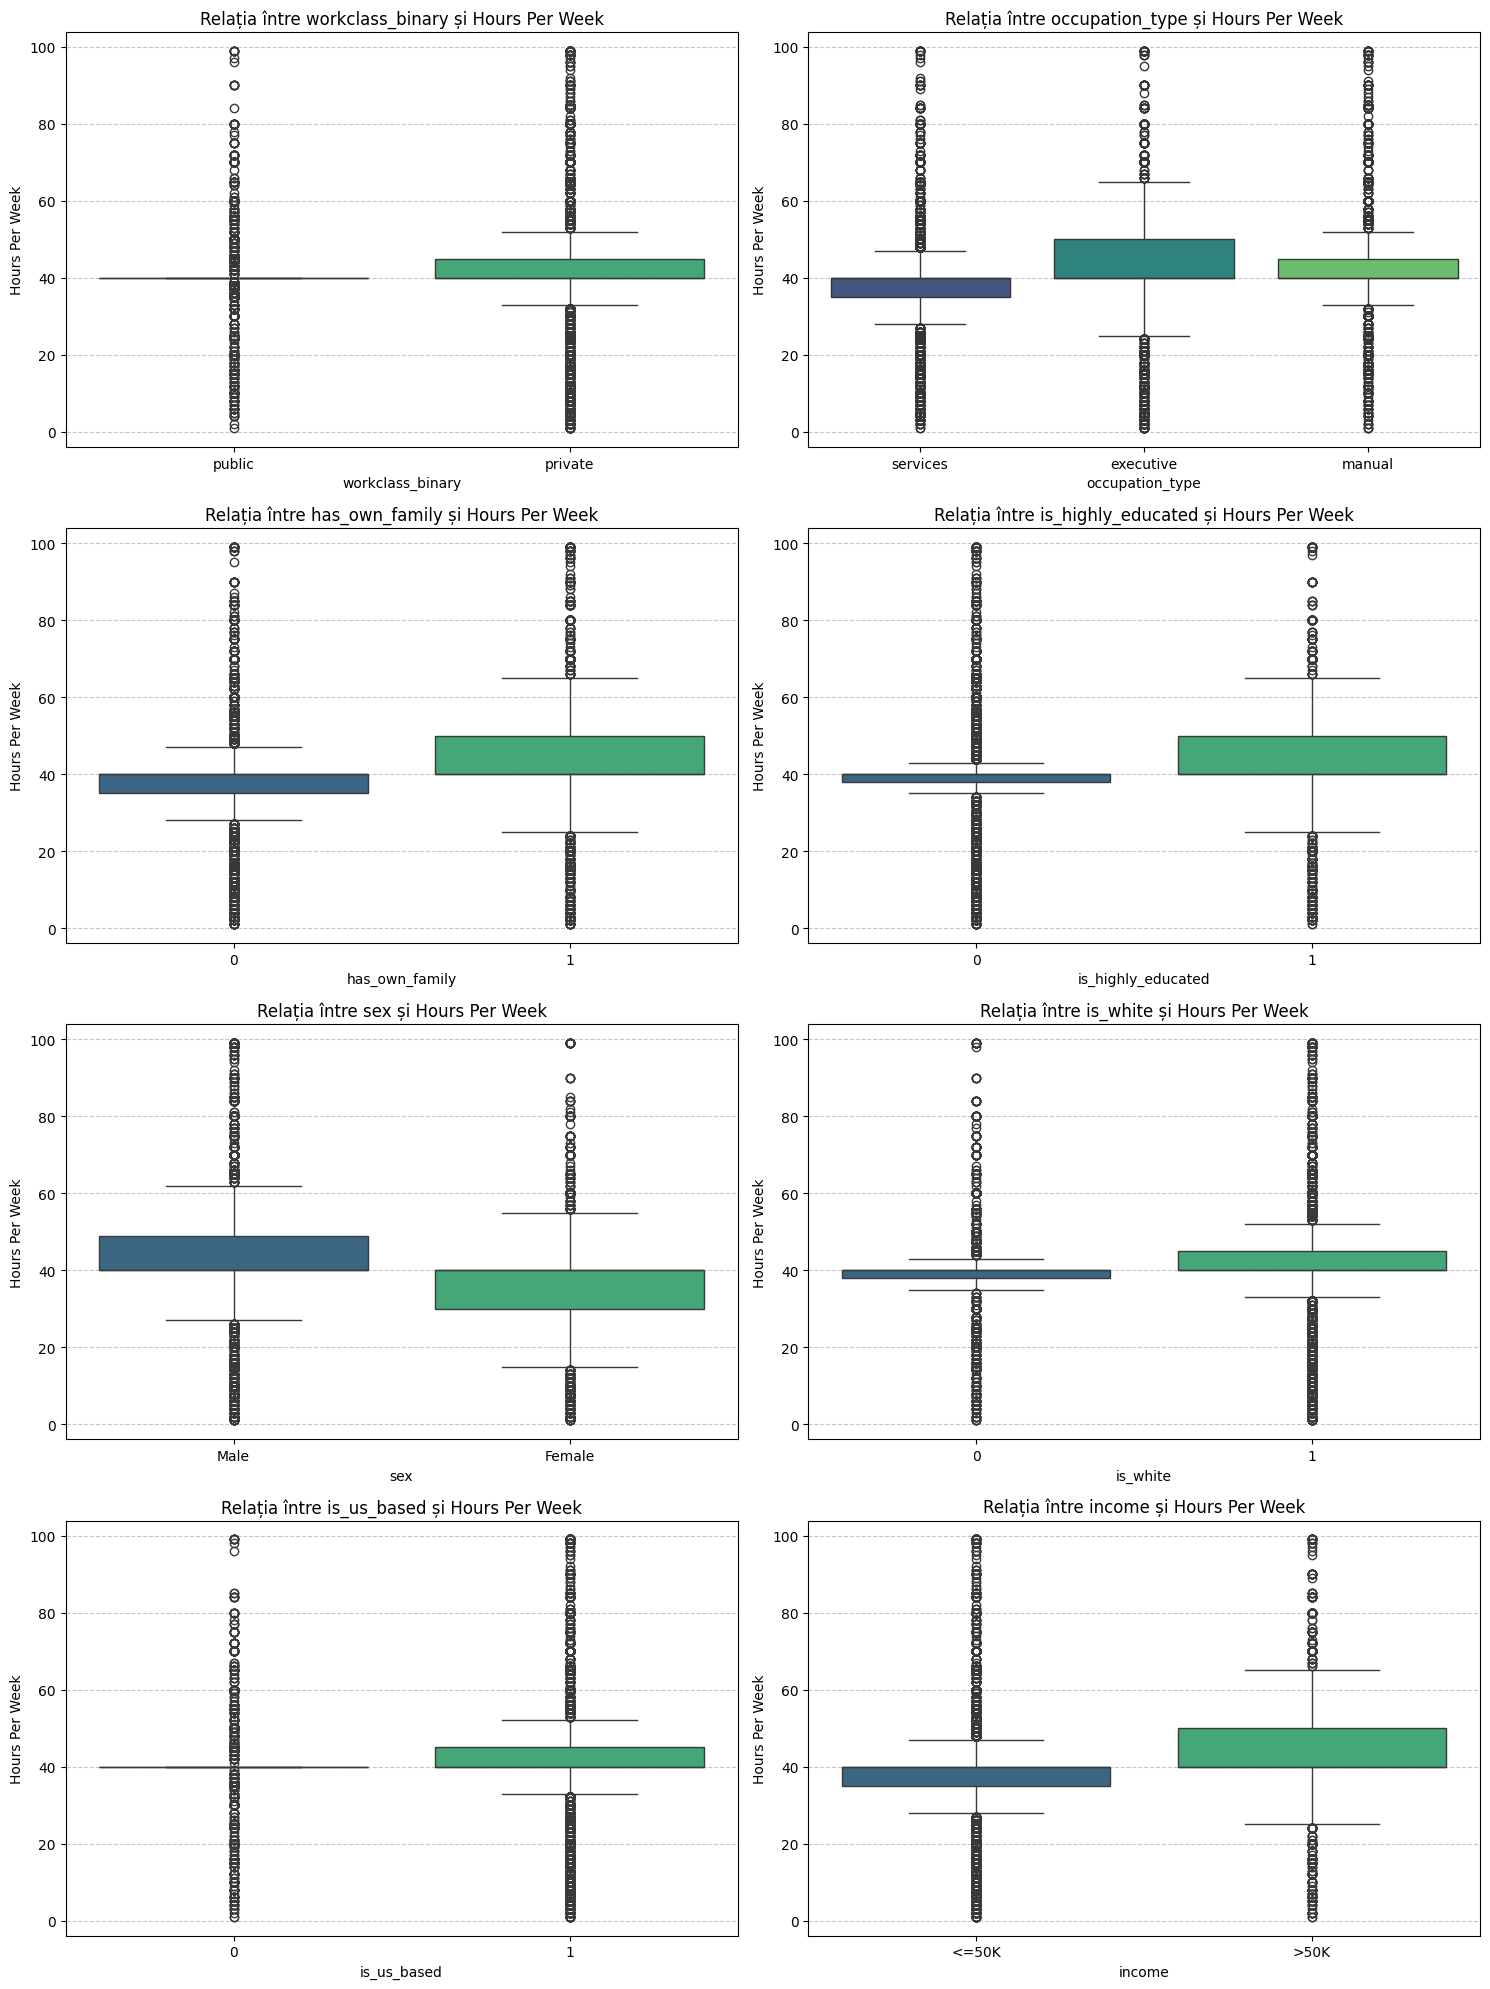

C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\2651210658.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[col], y=data['hours-per-week'], palette='viridis', split=True)
C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\2651210658.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[col], y=data['hours-per-week'], palette='viridis', split=True)
C:\Users\voicu\AppData\Local\Temp\ipykernel_19420\2651210658.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[col], y=data['hours-per-week'], palette='viridis'

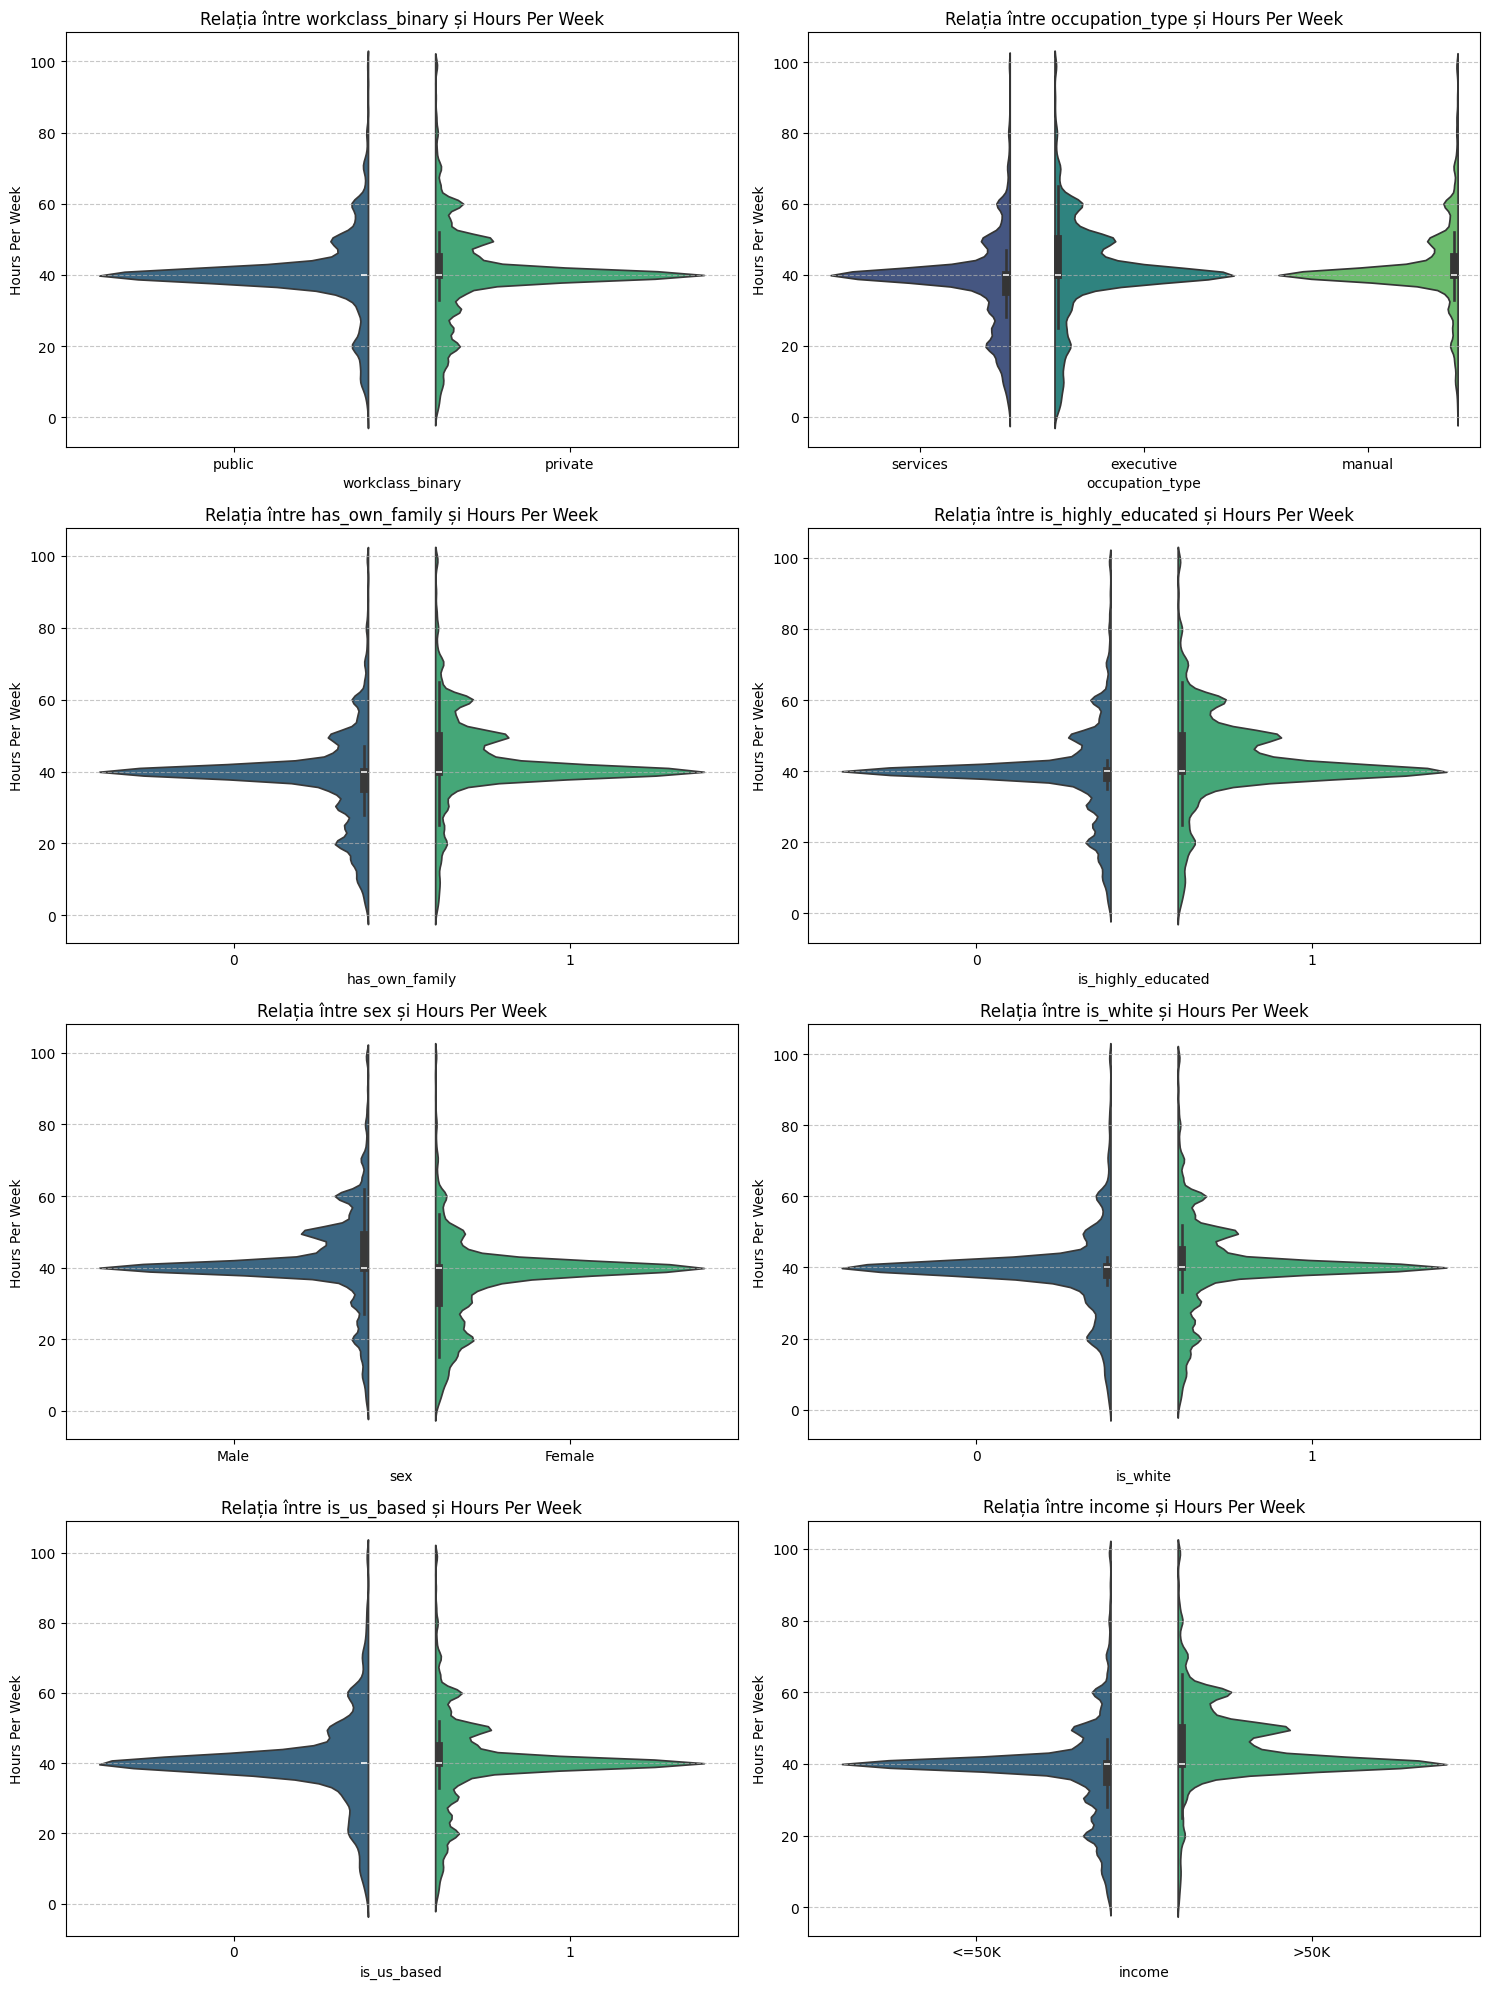

In [ ]:
# Lista variabilelor categorice
categorical_columns = ['workclass_binary', 'occupation_type', 'has_own_family', 'is_highly_educated', 'sex', 'is_white', 'is_us_based', 'income']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i) 
    sns.boxplot(x=data[col], y=data['hours-per-week'], palette='viridis')
    plt.title(f'Relația între {col} și Hours Per Week')
    plt.xlabel(col)
    plt.ylabel('Hours Per Week')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Violin plots pentru variabilele categorice
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.violinplot(x=data[col], y=data['hours-per-week'], palette='viridis', split=True)
    plt.title(f'Relația între {col} și Hours Per Week')
    plt.xlabel(col)
    plt.ylabel('Hours Per Week')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


workclass_binary:
Key Insight: Private sector workers tend to work slightly more hours than public-sector workers, with a broader distribution of hours.
Relevance: Moderate. This variable contributes meaningful differences to working hours.

occupation_type:
Key Insight: Executives and manual workers tend to work more hours on average than service workers, with executives showing the broadest range of hours.
Relevance: Moderate. Occupation type is a valuable predictor.

has_own_family:
Key Insight: Individuals with their own family (spouse/child) work more hours on average, with a noticeable shift in the median and a broader distribution.
Relevance: High. Strong relationship with hours-per-week.

is_highly_educated:
Key Insight: Highly educated individuals work slightly more hours on average, with a broader range of hours compared to less educated individuals.
Relevance: Moderate. Education level provides value but has overlapping distributions.

sex:
Key Insight: Males tend to work slightly more hours than females, with a broader spread of hours. The difference is small but consistent.
Relevance: Weak to moderate. Useful but not a strong predictor.

is_white:
Key Insight: Minimal differences in working hours between White and non-White individuals, with nearly identical medians and distributions.
Relevance: Weak. Likely not a significant predictor.

is_us_based:
Key Insight: U.S.-based workers tend to work slightly more hours on average, but the difference is minimal and distributions largely overlap.
Relevance: Weak. Likely not a significant predictor.

income:
Key Insight: High-income earners (>50K) work significantly more hours on average than those earning <=50K. This feature has a strong and clear relationship with hours-per-week.
Relevance: High. A strong predictor of working hours.


Retain for Modeling:
workclass_binary, occupation_type, has_own_family, is_highly_educated, and income.
Consider Dropping:
is_white and is_us_based due to weak or negligible differences in working hours.

In [ ]:
# Codificarea variabilelor categorice
categorical_columns = ['workclass_binary', 'occupation_type', 'income', 'sex']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
encoded_features = ohe.fit_transform(data[categorical_columns])

# Convertim variabilele codificate în DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

# Filtrăm și eliminăm orice coloană redundanță sau cu toate valorile egale cu 0 (cum ar fi cele cu NaN)
encoded_df = encoded_df.loc[:, (encoded_df.sum(axis=0) > 0)]

# Adăugăm noile variabile codificate și eliminăm cele originale
data = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

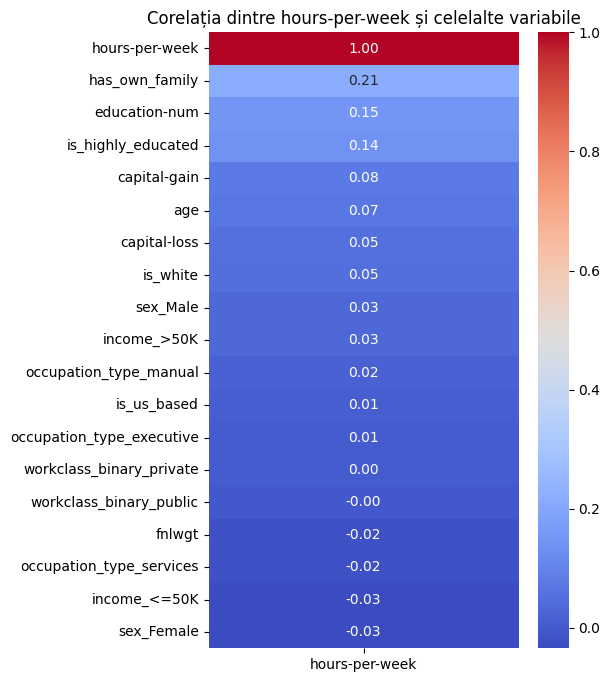

In [26]:
#Matricea de corelație
# Selectăm doar coloanele numerice
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Matricea de corelație completă
correlation_matrix = numeric_data.corr()

# Selectăm doar corelațiile cu variabila țintă 'hours-per-week'
target_correlation = correlation_matrix[['hours-per-week']].sort_values(by='hours-per-week', ascending=False)

# Vizualizare grafică a corelațiilor
plt.figure(figsize=(5, 8))
sns.heatmap(target_correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Corelația dintre hours-per-week și celelalte variabile')
plt.show()

In [39]:
data.to_csv("data_preprocessed_2.csv", index=False)

In [40]:
# Check for NaNs in the entire dataset
print("Total NaNs in dataset:", data.isnull().sum().sum())
print("NaNs per column:\n", data.isnull().sum())

Total NaNs in dataset: 624
NaNs per column:
 age                          24
workclass                    24
fnlwgt                       24
education                    24
education-num                24
marital-status               24
occupation                   24
relationship                 24
race                         24
capital-gain                 24
capital-loss                 24
hours-per-week               24
native-country               24
is_highly_educated           24
is_us_based                  24
has_own_family               24
is_white                     24
workclass_binary_private     24
workclass_binary_public      24
occupation_type_executive    24
occupation_type_manual       24
occupation_type_services     24
income_<=50K                 24
income_>50K                  24
sex_Female                   24
sex_Male                     24
dtype: int64


In [41]:
# Drop rows with any NaN values
data_clean = data.dropna()

In [42]:
# Check for NaNs in the entire dataset
print("Total NaNs in dataset:", data_clean.isnull().sum().sum())
print("NaNs per column:\n", data_clean.isnull().sum())

Total NaNs in dataset: 0
NaNs per column:
 age                          0
workclass                    0
fnlwgt                       0
education                    0
education-num                0
marital-status               0
occupation                   0
relationship                 0
race                         0
capital-gain                 0
capital-loss                 0
hours-per-week               0
native-country               0
is_highly_educated           0
is_us_based                  0
has_own_family               0
is_white                     0
workclass_binary_private     0
workclass_binary_public      0
occupation_type_executive    0
occupation_type_manual       0
occupation_type_services     0
income_<=50K                 0
income_>50K                  0
sex_Female                   0
sex_Male                     0
dtype: int64


In [ ]:

#Select the top 11 features from correlation matrix and the target variable
selected_features = [
    'has_own_family','education-num' , 'is_highly_educated', 'capital-gain',
    'age', 'capital-loss', 'is_white', 'sex_Male', 'income_>50K', 'sex_Female', 'income_<=50K'
]
target_variable = 'hours-per-week'

# Split the data into features (X) and target (y)
X = data_clean[selected_features]
y = data_clean[target_variable]

Split the data into Train, Validation, and Test sets (70%-15%-15%)
# First split into Train+Validation and Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split Train+Validation into Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15 / 0.85, random_state=42)

# Confirm the split sizes
print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# Standardize numerical features
numerical_features = ['education-num', 'capital-gain', 'age', 'capital-loss']  
scaler = StandardScaler()

# Standardize numerical features in Train, Validation, and Test sets
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_val_scaled = X_val.copy()
X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Define an evaluation function
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y, predictions)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Evaluate the model on Train, Validation, and Test sets
train_results = evaluate_model(linear_model, X_train_scaled, y_train)
val_results = evaluate_model(linear_model, X_val_scaled, y_val)
test_results = evaluate_model(linear_model, X_test_scaled, y_test)

# Print Results
print("Linear Regression Baseline Results:")
print("Train Set:", train_results)
print("Validation Set:", val_results)
print("Test Set:", test_results)


Train size: 22759, Validation size: 4877, Test size: 4877
Linear Regression Baseline Results:
Train Set: {'MAE': 7.994521277125582, 'MSE': 142.56214310877334, 'RMSE': 11.939938990998796, 'R2': 0.06790805787025445}
Validation Set: {'MAE': 7.91965784525192, 'MSE': 141.62542813135533, 'RMSE': 11.90064822315807, 'R2': 0.058534607974236375}
Test Set: {'MAE': 8.05000817498625, 'MSE': 141.9104653264166, 'RMSE': 11.912617903988048, 'R2': 0.06582009275186296}


1. Key Metrics:
MAE (Mean Absolute Error): Around 8 hours across Train, Validation, and Test sets.
This means that the model's predictions are off by approximately 8 hours on average.
MSE (Mean Squared Error): ~142 on all sets.
Indicates the squared error magnitude, penalizing larger errors more heavily.
RMSE (Root Mean Squared Error): ~11.9 hours.
Suggests the standard deviation of prediction errors, emphasizing larger errors.
R² (R-squared): ~0.06–0.07.
The model explains only ~6–7% of the variance in the target variable (hours-per-week).

2. Observations:
Consistent Performance:
Metrics are very similar across Train, Validation, and Test sets, indicating no overfitting or underfitting.
Low Predictive Power:
The low R² value suggests that the linear regression model struggles to explain the variability in hours-per-week. It likely doesn't capture the relationships in the data well due to its linear nature.
MAE and RMSE Comparison:
The RMSE is slightly higher than MAE, which indicates the presence of some larger errors in the predictions.


In [ ]:


# Train a Decision Tree Regressor with default parameters
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Evaluate the model
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y, predictions)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Evaluate on Train, Validation, and Test sets
train_results = evaluate_model(decision_tree_model, X_train_scaled, y_train)
val_results = evaluate_model(decision_tree_model, X_val_scaled, y_val)
test_results = evaluate_model(decision_tree_model, X_test_scaled, y_test)

# Print Results
print("Decision Tree Regression Baseline Results:")
print("Train Set:", train_results)
print("Validation Set:", val_results)
print("Test Set:", test_results)


Decision Tree Regression Baseline Results:
Train Set: {'MAE': 5.46601535308375, 'MSE': 78.59476121529254, 'RMSE': 8.865368645199846, 'R2': 0.4861360665258032}
Validation Set: {'MAE': 8.94147698948882, 'MSE': 176.59219662857276, 'RMSE': 13.288799668464145, 'R2': -0.17390954309003548}
Test Set: {'MAE': 9.190501021533613, 'MSE': 179.43459941024364, 'RMSE': 13.395320056282479, 'R2': -0.18119686979114435}


1. Key Metrics:
Train Set:
MAE: 5.47 hours — the average prediction error is lower on the train set compared to the Linear Regression model (~8 hours).
MSE: 78.59 — significantly better than Linear Regression (142.56).
RMSE: 8.87 hours — improved performance compared to Linear Regression (~11.9 hours).
R²: 0.486 — the model explains ~49% of the variance in hours-per-week for the train set, significantly better than Linear Regression.
Validation and Test Sets:
MAE: ~9 hours — higher than the train set, indicating some overfitting.
MSE: ~176–179 — worse than the train set and Linear Regression's test performance (~142).
RMSE: ~13.3 hours — increased error compared to Linear Regression (~11.9 hours).
R²: ~-0.18 — negative values indicate poor generalization on unseen data, as the model performs worse than the mean baseline.
2. Observations:
Overfitting:
The Decision Tree Regression model fits the training data well (R² = 0.486) but performs poorly on the validation and test sets (negative R²). This indicates overfitting, which is common for decision trees without proper hyperparameter tuning.
Performance Comparison:
On the training set, Decision Tree Regression outperforms Linear Regression.
On the validation and test sets, Decision Tree Regression performs worse due to overfitting.
MAE and RMSE:
The error magnitudes (MAE and RMSE) are higher for the Decision Tree model on validation and test sets compared to Linear Regression.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],                # Depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 10],           # Minimum samples per leaf
    'max_features': [None, 'sqrt', 'log2']       # Number of features to consider at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Using negative MSE for scoring
    cv=5,                              # 5-fold cross-validation
    verbose=1,
    n_jobs=-1                          # Use all available cores
)

# Perform GridSearchCV on the training set
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model
train_results = evaluate_model(best_model, X_train_scaled, y_train)
val_results = evaluate_model(best_model, X_val_scaled, y_val)
test_results = evaluate_model(best_model, X_test_scaled, y_test)

# Print Results
print("Tuned Decision Tree Regression Results:")
print("Train Set:", train_results)
print("Validation Set:", val_results)
print("Test Set:", test_results)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Tuned Decision Tree Regression Results:
Train Set: {'MAE': 7.4722658797314, 'MSE': 123.60688081818259, 'RMSE': 11.117863140828034, 'R2': 0.19184030844350053}
Validation Set: {'MAE': 7.457590707094712, 'MSE': 124.62103299798807, 'RMSE': 11.163379103030948, 'R2': 0.1715725683294098}
Test Set: {'MAE': 7.56501060956232, 'MSE': 127.76985239403483, 'RMSE': 11.303532739548059, 'R2': 0.1589060850162065}


1. Best Hyperparameters:
max_depth: 5
max_features: None (uses all features at each split)
min_samples_leaf: 10 (at least 10 samples per leaf node)
min_samples_split: 2 (minimum samples required to split an internal node)
These parameters indicate a more constrained Decision Tree, which helps combat overfitting.

2. Tuned Metrics:
Train Set:
MAE: 7.47 — Slightly higher than the overfit baseline (~5.47), but this indicates better generalization.
MSE: 123.61 — Much improved compared to the overfit baseline (~78.59).
R²: 0.19 — Indicates that the model now explains ~19% of the variance in the training set, less than the overfit baseline (49%) due to regularization.
Validation Set:
MAE: 7.46 — A notable improvement from the overfit baseline (~8.94).
MSE: 124.62 — Reduced significantly compared to the baseline (~176.59).
R²: 0.17 — Positive, unlike the baseline's negative R² (-0.17), indicating better generalization.
Test Set:
MAE: 7.57 — Improved compared to the baseline (~9.19).
MSE: 127.77 — Lower than the baseline (~179.43).
R²: 0.16 — Significantly improved over the baseline's negative R² (-0.18).

3. Observations:
Overfitting Mitigated:
The tuned model generalizes better, with closer performance across Train, Validation, and Test sets.
Improved Performance:
Compared to the baseline Decision Tree, all metrics (MAE, MSE, RMSE, and R²) show improvement on the Validation and Test sets.
Comparison with Linear Regression:
MAE: Slightly better for the tuned Decision Tree (~7.57) vs. Linear Regression (~8.05).
MSE and RMSE: Decision Tree performs better, with RMSE ~11.30 compared to Linear Regression's ~11.91.
R²: Decision Tree's R² (0.16) is better than Linear Regression's (0.06).


Metric	        Linear Regression  	Tuned Decision Tree
Train MAE	    7.99	            7.47
Train R²	    0.07	            0.19
Validation MAE  7.92	            7.46
Validation R²	0.06	            0.17
Test MAE	    8.05	            7.57
Test R²	        0.07	            0.16

The Tuned Decision Tree Regression outperforms Linear Regression in all key metrics on the Validation and Test sets.

In [65]:
# Step 1: Initialize SGDRegressor
sgd_model = SGDRegressor(
    loss='squared_error',  # Default loss is MSE
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

# Step 2: Train the model
sgd_model.fit(X_train_scaled, y_train)

# Step 3: Evaluate the model
sgd_train_results = evaluate_model(sgd_model, X_train_scaled, y_train)
sgd_val_results = evaluate_model(sgd_model, X_val_scaled, y_val)
sgd_test_results = evaluate_model(sgd_model, X_test_scaled, y_test)

# Print Results
print("SGDRegressor Results:")
print("Train Set:", sgd_train_results)
print("Validation Set:", sgd_val_results)
print("Test Set:", sgd_test_results)

SGDRegressor Results:
Train Set: {'MAE': 7.9630021812793945, 'MSE': 142.67785414658175, 'RMSE': 11.944783553777011, 'R2': 0.06715152234402855}
Validation Set: {'MAE': 7.879697049087894, 'MSE': 141.59474520031063, 'RMSE': 11.899359024767286, 'R2': 0.058738575002514004}
Test Set: {'MAE': 8.01171642215576, 'MSE': 141.86834714631826, 'RMSE': 11.910849975812736, 'R2': 0.06609735177914622}


1. Key Metrics:
Train Set:
MAE: 7.96 — Comparable to Linear Regression but higher than Decision Tree.
MSE: 142.68 — Almost identical to Linear Regression (142.56), suggesting similar performance.
R²: 0.067 — Very close to Linear Regression (0.068), indicating the model captures limited variance.
Validation Set:
MAE: 7.88 — Slightly better than Linear Regression (7.92) but worse than Decision Tree (7.28).
MSE: 141.59 — Matches Linear Regression (141.62).
R²: 0.058 — Very close to Linear Regression (0.059).
Test Set:
MAE: 8.01 — Similar to Linear Regression (8.05) but worse than Decision Tree (7.31).
MSE: 141.87 — Matches Linear Regression (141.91).
R²: 0.066 — Similar to Linear Regression (0.065), but much lower than the Tuned Decision Tree (0.177).

2. Observations:
Performance Comparison:
SGDRegressor closely mirrors Linear Regression in terms of all metrics.
The Tuned Decision Tree outperforms SGDRegressor in every aspect, particularly on Validation and Test sets.
Generalization:
SGDRegressor generalizes well across Train, Validation, and Test sets, but its overall performance is subpar compared to the Decision Tree.
No Clear Advantage Over Linear Regression:
Despite using gradient descent, SGDRegressor does not offer significant advantages in this case.

In [52]:
# Generate predictions on the test set
test_predictions = best_model.predict(X_test_scaled)

# Compare actual vs predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_predictions
})

# Save predictions to a CSV file for further analysis
results_df.to_csv("decision_tree_test_predictions.csv", index=False)

print("Predictions saved to 'decision_tree_test_predictions.csv'.")


Predictions saved to 'decision_tree_test_predictions.csv'.


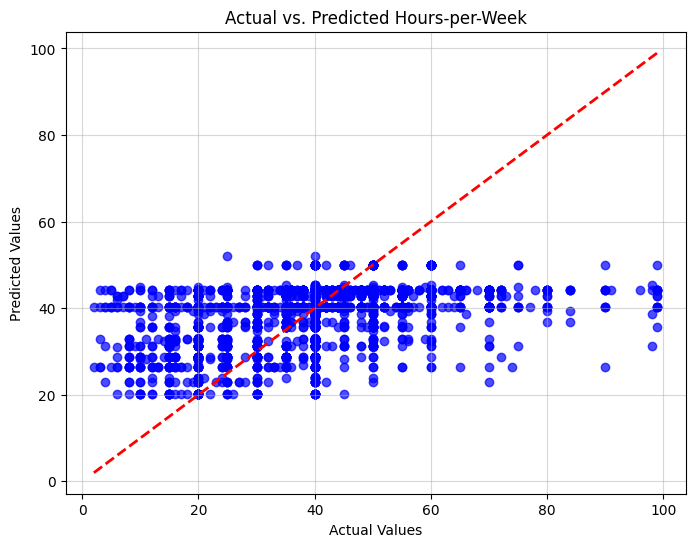

In [53]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Hours-per-Week")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(alpha=0.5)
plt.show()


In [ ]:
Underperformance for High Values:
Predictions tend to underestimate for higher actual values (e.g., above 60).
Better Performance in Common Ranges:
For the central range (30-50), predictions seem relatively closer to the actual values.

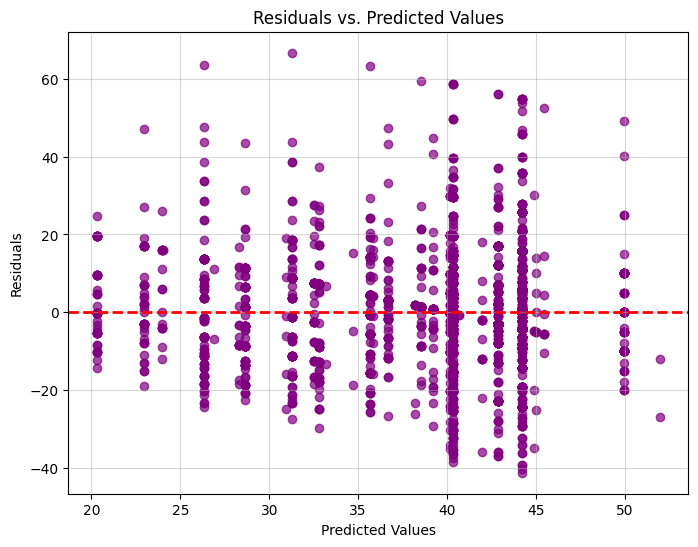

In [56]:
residuals = y_test - test_predictions

plt.figure(figsize=(8, 6))
plt.scatter(test_predictions, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(alpha=0.5)
plt.show()

Observations:
Random Distribution:
The residuals are somewhat randomly distributed, which is good and suggests the model does not have severe bias.
Variance in Residuals:
The spread of residuals appears consistent across predicted values, indicating homoscedasticity (equal variance).
Outliers:
Some residuals are large, especially for higher predicted values. These could indicate potential areas for further improvement.
Conclusion:
The residual plot does not reveal major systematic patterns, which suggests that the Tuned Decision Tree Regression model is performing well.
However, some large residuals (outliers) might need further investigation if higher accuracy is required.

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Train a Random Forest Regressor with default parameters
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Step 2: Evaluate the model
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y, predictions)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Evaluate on Train, Validation, and Test sets
train_results = evaluate_model(random_forest_model, X_train_scaled, y_train)
val_results = evaluate_model(random_forest_model, X_val_scaled, y_val)
test_results = evaluate_model(random_forest_model, X_test_scaled, y_test)

# Print Results
print("Random Forest Regression Results:")
print("Train Set:", train_results)
print("Validation Set:", val_results)
print("Test Set:", test_results)


Random Forest Regression Results:
Train Set: {'MAE': 6.191104666842124, 'MSE': 83.76979642899384, 'RMSE': 9.152584139410784, 'R2': 0.4523009366817722}
Validation Set: {'MAE': 8.19967474555491, 'MSE': 141.1250812041501, 'RMSE': 11.879607788313136, 'R2': 0.06186070076834438}
Test Set: {'MAE': 8.379665795852647, 'MSE': 144.90444897830233, 'RMSE': 12.037626384728108, 'R2': 0.046111050407539045}


1. Key Metrics:
Train Set:
MAE: 6.19 — Shows good performance, but the gap between Train and Validation/Test sets suggests some overfitting.
MSE: 83.77 — Reasonable performance on training data.
R²: 0.45 — The model explains ~45% of the variance in the training set.
Validation Set:
MAE: 8.20 — Worse than the Train set but comparable to Decision Tree and Linear Regression.
MSE: 141.13 — Matches closely with Linear Regression's Validation MSE (141.63).
R²: 0.06 — Very close to Linear Regression (0.058).
Test Set:
MAE: 8.38 — Slightly worse than Linear Regression (8.05) and Decision Tree (7.57).
MSE: 144.90 — Better than the baseline Decision Tree (179.43) but slightly worse than the tuned Decision Tree (127.77).
R²: 0.046 — Marginally lower than Linear Regression (0.065) and tuned Decision Tree (0.16).

2. Observations:
Overfitting:
Random Forest performs well on the Train set but struggles to generalize on Validation and Test sets, as indicated by the decrease in R² and increase in error metrics.
Performance Comparison:
Train Set: Random Forest performs better than Linear Regression but is similar to Decision Tree.
Validation/Test Sets: Random Forest shows similar performance to Linear Regression but is outperformed by the tuned Decision Tree.
MAE and RMSE:
Random Forest's validation and test errors (MAE and RMSE) are slightly higher than the tuned Decision Tree.
The Tuned Decision Tree Regression model remains the best choice based on Test set performance, with lower MAE, MSE, RMSE, and a higher R² compared to both Random Forest and Linear Regression.

In [57]:
#Step 1: Calculate Residuals
residuals = y_test - test_predictions

# Step 2: Identify High-Residual Cases
high_residual_threshold = 20  # Define a threshold for outliers
outlier_indices = residuals[abs(residuals) > high_residual_threshold].index
outliers = results_df.loc[outlier_indices]

print(f"Number of high-residual cases: {len(outliers)}")
print("Sample of high-residual cases:")
print(outliers.head())

# Step 3: Explore Characteristics of Outliers
high_residual_features = X_test_scaled.loc[outlier_indices]
outlier_analysis = pd.concat([high_residual_features, residuals.loc[outlier_indices]], axis=1)
outlier_analysis.columns = list(X_test.columns) + ['Residuals']

# Display a summary of outlier characteristics
print("Summary of Outlier Characteristics:")
print(outlier_analysis.describe())

Number of high-residual cases: 396
Sample of high-residual cases:
       Actual  Predicted
10559    77.0  40.340176
14580    11.0  32.783019
16031    20.0  40.340176
22969    75.0  49.953003
7887     20.0  42.897018
Summary of Outlier Characteristics:
       has_own_family  education-num  is_highly_educated  capital-gain  \
count      396.000000     396.000000           396.00000    396.000000   
mean         0.411616      -0.012178             0.25000      0.005112   
std          0.492749       1.033624             0.43356      1.010351   
min          0.000000      -3.540735             0.00000     -0.299000   
25%          0.000000      -0.425219             0.00000     -0.299000   
50%          0.000000      -0.035780             0.00000     -0.299000   
75%          1.000000       0.840459             0.25000     -0.299000   
max          1.000000       2.300857             1.00000      3.564548   

              age  capital-loss    is_white    sex_Male  income_>50K  \
count  39

Distribution of Residuals:

High residual cases include both under-predictions and over-predictions.
The largest errors appear for extreme values of hours-per-week.
Feature Importance:

Features such as capital-gain, age, and education-num have high variance among outliers.
Cases with extreme values in these features may be driving the high residuals.
Income and Family Status:

A significant number of outliers belong to individuals with incomes ≤50K (76.5%) and those without families (58.8%).
This suggests that these features may not fully capture variations in hours-per-week for outliers.


In [58]:
# Remove high-residual cases based on the identified indices
data_cleaned = data_clean.drop(outlier_indices)

# Redefine features (X) and target (y) for the cleaned dataset
X_cleaned = data_cleaned[selected_features]
y_cleaned = data_cleaned[target_variable]


In [ ]:
# Split the cleaned data into Train, Validation, and Test sets
X_train_val_cleaned, X_test_cleaned, y_train_val_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.15, random_state=42
)
X_train_cleaned, X_val_cleaned, y_train_cleaned, y_val_cleaned = train_test_split(
    X_train_val_cleaned, y_train_val_cleaned, test_size=0.15 / 0.85, random_state=42
)


In [60]:
# Standardize numerical features for the cleaned dataset
X_train_scaled_cleaned = X_train_cleaned.copy()
X_train_scaled_cleaned[numerical_features] = scaler.fit_transform(X_train_cleaned[numerical_features])

X_val_scaled_cleaned = X_val_cleaned.copy()
X_val_scaled_cleaned[numerical_features] = scaler.transform(X_val_cleaned[numerical_features])

X_test_scaled_cleaned = X_test_cleaned.copy()
X_test_scaled_cleaned[numerical_features] = scaler.transform(X_test_cleaned[numerical_features])


In [62]:
# Retrain the tuned Decision Tree Regression model on the cleaned data
best_model_cleaned = DecisionTreeRegressor(
    max_depth=5,
    max_features=None,
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)
best_model_cleaned.fit(X_train_scaled_cleaned, y_train_cleaned)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

In [63]:
# Evaluate the retrained model on Train, Validation, and Test sets
train_results_cleaned = evaluate_model(best_model_cleaned, X_train_scaled_cleaned, y_train_cleaned)
val_results_cleaned = evaluate_model(best_model_cleaned, X_val_scaled_cleaned, y_val_cleaned)
test_results_cleaned = evaluate_model(best_model_cleaned, X_test_scaled_cleaned, y_test_cleaned)

# Print Results
print("Retrained Decision Tree Regression Results (After Removing Outliers):")
print("Train Set:", train_results_cleaned)
print("Validation Set:", val_results_cleaned)
print("Test Set:", test_results_cleaned)


Retrained Decision Tree Regression Results (After Removing Outliers):
Train Set: {'MAE': 7.1373484019707245, 'MSE': 113.03919379941085, 'RMSE': 10.631989174157903, 'R2': 0.1994117766578304}
Validation Set: {'MAE': 7.281805610173631, 'MSE': 115.80392853855889, 'RMSE': 10.761223375553492, 'R2': 0.20491502434465125}
Test Set: {'MAE': 7.30986727557145, 'MSE': 121.92850941188196, 'RMSE': 11.042124316085287, 'R2': 0.17725247452318815}


1. Key Metrics:
Train Set:
MAE: 7.14 — Slightly lower than the previous tuned model (7.47).
MSE: 113.04 — Improved compared to the previous value (123.61).
R²: 0.199 — Similar to the previous model (0.19), indicating consistent performance.
Validation Set:
MAE: 7.28 — Improved compared to the previous tuned model (7.46).
MSE: 115.80 — Better than the previous model's validation MSE (124.62).
R²: 0.205 — Improved from the previous model's 0.17.
Test Set:
MAE: 7.31 — Improved compared to the previous tuned model (7.57).
MSE: 121.93 — Better than the previous model (127.77).
R²: 0.177 — Improved compared to the previous value (0.16).

2. Observations:
Improved Generalization:
Validation and Test set metrics show consistent improvement after removing high-residual cases.
This indicates that the removed cases were likely noise or anomalies, and their removal helped the model focus on meaningful patterns.
Reduced Overfitting:
The gap between Train, Validation, and Test performance has narrowed further, showing that the model generalizes better to unseen data.
MAE, MSE, and R²:
All metrics improved across the board, particularly on the Validation and Test sets, making this version of the Decision Tree model the most robust so far.
Comparison with Previous Model
Metric	          Tuned Decision Tree (Before)	Retrained Decision Tree (After)
Train MAE	      7.47	                        7.14
Train R²	      0.19	                        0.20
Validation MAE	  7.46	                        7.28
Validation R²	  0.17	                        0.205
Test MAE	      7.57	                        7.31
Test R²	          0.16	                        0.177


Metric	             Linear Regression	Tuned Decision Tree	Random Forest	SGDRegressor
Train MAE	         7.99	            7.14	       6.19	                7.96
Train R²	         0.07	            0.20	       0.45	                0.067
Validation MAE	     7.92	            7.28	       8.20	                7.88
Validation R²	     0.06	            0.205	       0.06	                0.059
Test MAE	         8.05	            7.31	       8.38	                8.01
Test R²	             0.065	            0.177	       0.046	            0.066

Best Model:

The Tuned Decision Tree Regression model remains the best-performing model with:
Lowest MAE and RMSE across Validation and Test sets.
Highest R², indicating better explanatory power.